In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Visualize the distribution of perplexity scores of each method.

For each method, create a histogram showing the difference between the original and counterfactual perplexity scores.

Dataset: sst_2
Method: hotflip
Original perplexity length:  928
Counterfactual perplexity length:  899
Median original perplexity: 362.9747009277344
Median counterfactual perplexity: 521.533447265625


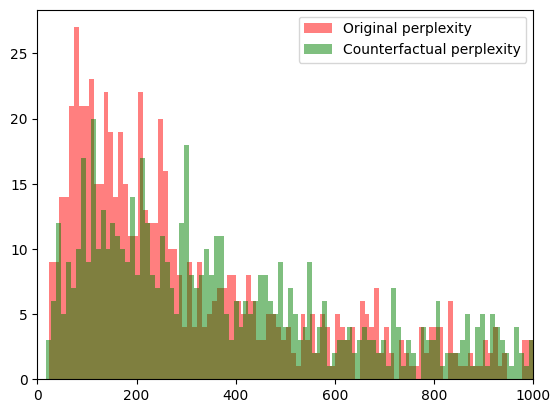

Method: closs
Original perplexity length:  912
Counterfactual perplexity length:  876
Median original perplexity: 346.30133056640625
Median counterfactual perplexity: 410.12831115722656


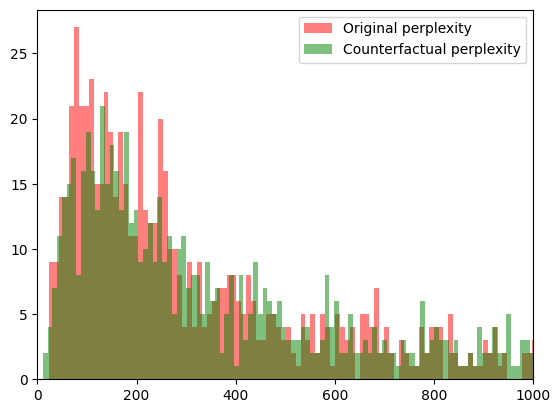

Method: polyjuice
Original perplexity length:  927
Counterfactual perplexity length:  979
Median original perplexity: 361.6271057128906
Median counterfactual perplexity: 136.4390411376953


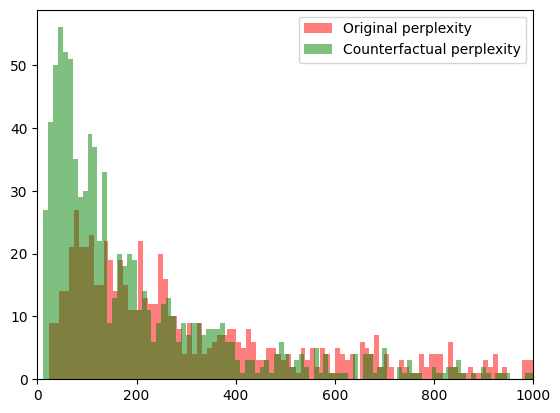

Method: fizlenaive
Original perplexity length:  928
Counterfactual perplexity length:  934
Median original perplexity: 362.9747009277344
Median counterfactual perplexity: 241.80455017089844


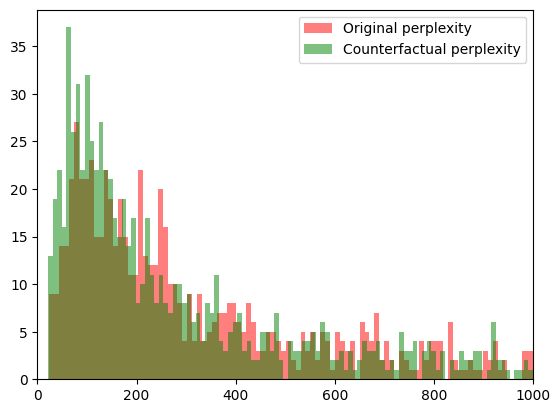

Method: fizleguided
Original perplexity length:  928
Counterfactual perplexity length:  909
Median original perplexity: 362.9747009277344
Median counterfactual perplexity: 258.66082763671875


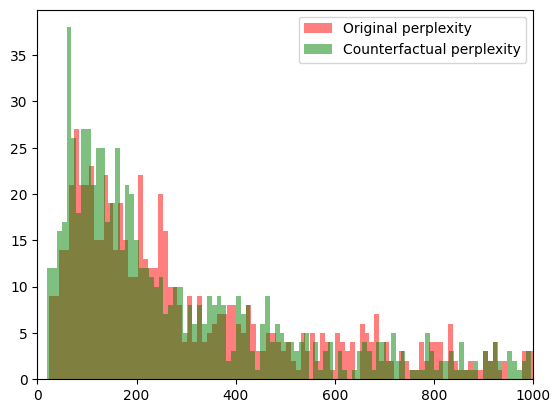

In [9]:
datasets = ["sst_2"]
datapoints = 1000
methods = ["hotflip", "closs", "polyjuice", "fizlenaive", "fizleguided"]
cutoff = 10000

for dataset in datasets:
    print(f"Dataset: {dataset}")
    for method in methods:
        print(f"Method: {method}")
        df = pd.read_csv(f"../output/{method}-output-{dataset}-{datapoints}.csv")

        original_perplexity = df["original_perplexity"].dropna()
        counterfactual_perplexity = df["counterfactual_perplexity"].dropna()

        original_perplexity = original_perplexity[original_perplexity < cutoff]
        counterfactual_perplexity = counterfactual_perplexity[counterfactual_perplexity < cutoff]

        print("Original perplexity length: ", len(original_perplexity))
        print("Counterfactual perplexity length: ", len(counterfactual_perplexity))

        plt.hist(original_perplexity, bins=1000, alpha=0.5, label="Original perplexity", color="red");
        plt.hist(counterfactual_perplexity, bins=1000, alpha=0.5, label="Counterfactual perplexity", color="green");
        plt.legend(["Original perplexity", "Counterfactual perplexity"])

        print(f"Median original perplexity: {np.median(original_perplexity)}")
        print(f"Median counterfactual perplexity: {np.median(counterfactual_perplexity)}")

        plt.xlim(0, 1000)
        plt.show()
